# Exercise I

Using the dataset **autocasion.csv**:

## Part I

- Perform an EDA (Exploratory Data Analysis) on the data.  
- Preprocess the data:  
  - Handle NaNs (remove only those in **precio**).  
  - Split **Fecha de matriculación** into month and year (as int).  
  - Convert numerical columns (**kilómetros, potencia, largo, ancho, alto, puertas, urbano, carretera, medio, co2, deposito, precio**) to float.  
  - Process **garantía** (Sí → NaN, No → 0).  
  - Clean **color**.  
  - Split **maletero_l** into **maletero_1** and **maletero_2** (float).  
  - Transform **sobrealimentacion** (“-” → NaN).  
- Define a function to visualize columns:  
  - **Categorical**: bar plot + boxplot with **precio**.  
  - **Continuous**: histogram + boxplot + scatterplot with **precio**.  
- Handle outliers (Tukey’s Fence or Z-Score).  
- Encode categorical variables:  
  - **LabelEncoder** for binary categories.  
  - **OneHotEncoder** for multi-categories.  
- Fill NaNs using **KNNImputer**.  
- Create a correlation heatmap (identify features most correlated with **precio**).  
- Calculate feature importance using **RandomForestRegressor()**.  
- Save the processed dataset as **autocasion_procesado.csv**.  

---

## Part II

Using the dataset **autocasion_procesado.csv**:

- Split the data into features (**X**) and target (**precio**).  
- Use **train_test_split()** with `test_size=0.2`, `random_state=42`.  
- Scale data with **MinMaxScaler** or **StandardScaler** (for both **X** and **y**).  
- Train several regression models in a for loop.  
- Evaluate models with:  
  - **Mean Absolute Error (MAE)**  
  - **Mean Squared Error (MSE)**  
  - **R Squared (r2_score)**  
- Compare results in a DataFrame with columns:  
  | model_name | mae | mse | r2_score |  
- Select the best model (highest r2_score).  

---

## Part III

- Randomly sample **30%** of the dataset (`random_state=42`).  
- Perform Feature Selection to reduce dimensionality.  
- Scale the data.  
- Define **X** (features) and **y** (**precio**).  
- Perform a **GridSearchCV()** with **RandomForestRegressor()**:  
  - Define a parameter grid.  
  - Evaluate with **MAE**, **MSE**, and **r2_score**.  
  - Use **cv = 5**, optimize for **r2_score**.  
- Print the best parameters.  
- Train a new **RandomForestRegressor()** with the best parameters.  
- Save the trained model as a **.pkl** file.  

_Optional: Repeat with another regression model that supports hyperparameter tuning._  


## Import Libraries

In [549]:
#Basic
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Imputation
from sklearn.impute import KNNImputer

#Escalado
from sklearn.preprocessing import MinMaxScaler

#Train test split
from sklearn.model_selection import train_test_split

#Modeling and model comparison
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Hyperparametrization
from sklearn.model_selection import GridSearchCV

#Save
import pickle

# Part 1

- EDA Scope: Analyzes distributions, correlations, and patterns in features like year, mileage, power, and fuel type to understand price drivers.
- Preprocessing Steps: Cleans data (e.g., handling NaNs, splitting dates, encoding categoricals) to prepare for modeling.
- Feature Importance: Uses RandomForestRegressor to identify key predictors (e.g., year, kilometers) for price.

## Data Loading

In [ ]:
df = pd.read_csv("...\data\autocasion.csv", low_memory=False)
df

,Fecha de matriculación,Kilómetros,Cambio,Potencia (cv),Garantía,Color,Distintivo ambiental,largo,ancho,alto,...,combustible,cilindrada_cm3,cilindros,sobrealimentacion,urbano,carretera,medio,co2,deposito,precio
0,02/2023,3.900 km,Manual,179,12 meses,Negro,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000 €
1,06/2023,4.000 km,Manual,180,24 meses,Gris,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.500 €
2,09/2023,1 km,Automático,154,36 meses,Azul Poisson (metalizado)\n ...,0 EMISIONES,3673 mm,1682 mm,1518 mm,...,Corriente eléctrica,0.000,NaN,Turbo,"0,00","0,00","0,00",-,"0,00",43.800 €
3,10/2023,7 km,Automático,154,36 meses,PUNKN METALLIC,0 EMISIONES,3673 mm,1682 mm,1518 mm,...,Corriente eléctrica,0.000,NaN,Turbo,"0,00","0,00","0,00",-,"0,00",38.990 €
4,08/2023,10 km,Automático,154,36 meses,Verde,0 EMISIONES,3673 mm,1682 mm,1518 mm,...,Corriente eléctrica,0.000,NaN,Turbo,"0,00","0,00","0,00",-,"0,00",35.990 €
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106426,12/2020,31.800 km,Automático,390,12 meses,DEMIN BLUE,0 EMISIONES,4950 mm,2008 mm,1776 mm,...,Gasolina y corriente eléctrica,1.969,4.0,Turbo,"0,00","0,00","2,10",48,"70,00",61.500 €
106427,01/2021,39.700 km,Automático,390,12 meses,MAPLE BROWN\n / Metalizado,0 EMISIONES,4950 mm,2008 mm,1776 mm,...,Gasolina y corriente eléctrica,1.969,4.0,Turbo,"0,00","0,00","2,10",48,"70,00",59.890 €
106428,03/2009,6.500 km,Automático,343,No,Blanco,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.900 €
106429,01/2007,8.500 km,Manual,367,No,Negro,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.900 €


## Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106431 entries, 0 to 106430
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fecha de matriculación  106404 non-null  object 
 1   Kilómetros              106404 non-null  object 
 2   Cambio                  106364 non-null  object 
 3   Potencia (cv)           106404 non-null  object 
 4   Garantía                100572 non-null  object 
 5   Color                   106404 non-null  object 
 6   Distintivo ambiental    98035 non-null   object 
 7   largo                   78550 non-null   object 
 8   ancho                   78550 non-null   object 
 9   alto                    78550 non-null   object 
 10  batalla_mm              78550 non-null   float64
 11  maletero_l              78550 non-null   object 
 12  peso_masa_kg            78550 non-null   float64
 13  carroceria              78550 non-null   object 
 14  puertas             

In [343]:
df.describe()

,batalla_mm,peso_masa_kg,plazas,cilindrada_cm3,cilindros
count,78550.000000,78550.000000,78550.000000,78550.000000,76121.000000
mean,2665.759427,1982.244889,4.925029,131.312300,4.053244
std,181.552995,386.849738,0.621449,333.903894,1.142300
min,0.000000,0.000000,2.000000,0.000000,2.000000
25%,2583.000000,1750.000000,5.000000,1.497000,4.000000
50%,2655.000000,1925.000000,5.000000,1.896000,4.000000
75%,2734.000000,2150.000000,5.000000,2.400000,4.000000
max,4575.000000,3500.000000,9.000000,999.000000,16.000000


## Data Cleaning and Preprocessing

In [351]:
#Precio

df['precio'] = (
    df['precio']
    .str.replace(r'[^\d,\.]', '', regex=True)      # Remove currency symbols, spaces, etc.
    .str.replace(r'\.', '', regex=True)            # Remove thousands separator (dot)
    .str.replace(',', '.', regex=False)            # Replace decimal commas with dots (if needed)
    .replace('', np.nan)                           # Handle empty strings
    .astype(float)
)

df_II = df.dropna(subset = 'precio').copy()

In [353]:
#Preparar las columnas numericas para cast. El casteado no tiene que agregar nan

df_II['kilometros_num'] = (
    df_II['Kilómetros']
    .str.replace(' km', '', regex=False)
    .str.replace('.', '', regex=False)  # remove thousands separator
    .str.strip()).astype('float64')

df_II['largo_num'] = df_II['largo'].str.replace(' mm', '', regex = False).str.replace(r'\.', '', regex=True).replace({'-': np.nan}).str.strip()

df_II['ancho_num'] = df_II['ancho'].str.replace(' mm', '', regex = False).str.replace(r'\.', '', regex=True).replace({'-': np.nan}).str.strip()

df_II['alto_num'] = df_II['ancho'].str.replace(' mm', '', regex = False).str.replace(r'\.', '', regex=True).replace({'-': np.nan}).str.strip()

df_II['urbano_num'] = df_II['urbano'].str.replace(',', '.', regex = False).str.replace(r'\.', '', regex=True)

df_II['medio_num'] = df_II['medio'].str.replace(',', '.', regex = False).str.replace(r'\.', '', regex=True)

df_II['deposito_num'] = df_II['deposito'].str.replace(',', '.', regex = False).str.replace(r'\.', '', regex=True)

df_II['carretera_num'] = df_II['carretera'].str.replace(',', '.', regex = False).str.replace(r'\.', '', regex=True)

In [355]:
# Año y Mes

df_II[['month', 'year']] = df_II['Fecha de matriculación'].str.extract(r'(?:(\d{1,2})/)?(\d{4})')

df_II['month'] = df_II['month'].astype('Int64')  # 'Int64' to keep NaNs
df_II['year'] = df_II['year'].astype('Int64')
df_II.loc[df_II['month'] > 12, 'month'] = np.nan

In [357]:
#Maletero

df_II[['maletero_1', 'maletero_2']] = df_II['maletero_l'].str.split('/', expand = True)

df_II['maletero_1'] = pd.to_numeric(df_II['maletero_1'], errors = 'coerce')

df_II.loc[:, 'maletero_1'] = df_II['maletero_1'].astype('float64')

df_II['maletero_2'] = pd.to_numeric(df_II['maletero_2'], errors = 'coerce')

df_II.loc[:, 'maletero_2'] = df_II['maletero_2'].astype('float64')

In [359]:
#Garantía

df_II['Garantía'] = df_II['Garantía'].replace({'No': '0', 'Sí': np.nan})

df_II['Garantía'] = df_II['Garantía'].str.replace(' meses', '', regex = False).str.strip()

df_II['Garantía_num'] = pd.to_numeric(df_II['Garantía'], errors = 'coerce')

df_II.loc[:, 'Garantía_num'] = df_II['Garantía'].astype('float64')

In [361]:
#Sobrealimentación

df_II['sobrealimentacion_ok'] = df_II['sobrealimentacion'].replace({'-': np.nan})

allowed_sobre = ['Turbo', 'Turbo de geometría variable', 'Doble turbo', 'Tipo de sobrealimentador', 'Compresor y turbo', 'Compresor Lisholm', 'Compresor de raices']

df_II['sobrealimentacion_ok'] = df_II['sobrealimentacion_ok'].apply(lambda x: x if x in allowed_sobre else 'Sobre_Desconocido')

In [363]:
# Cambio

allowed_cambio = ['Manual', 'Automático']

df_II['cambio_ok'] = df_II['Cambio'].apply(lambda x: x if x in allowed_cambio else 'Cambio_Desconocido')

In [365]:
#Sello ambiental

allowed_sello = ['C', 'ECO', 'B', '0 EMISIONES']

df_II['sello_amb_ok'] = df_II['Distintivo ambiental'].apply(lambda x: x if x in allowed_sello else 'Sello_Desconocido')

In [367]:
#Carroceria

allowed_carro = ['Berlina', 'Convertible', 'Todo Terreno', 'Coupe', 'Roadster',
       'Stationwagon', 'Monovolumen', 'Combi', 'Targa',
       'Pick-Up Doble Cabina', 'Pick-Up']

df_II['carro_ok'] = df_II['carroceria'].apply(lambda x: x if x in allowed_carro else 'Carro_Desconocida')

In [369]:
#Colores 

df_II.loc[df_II['Color'].str.contains('Gris', case=False, na=False), 'Color'] = 'Gris'

df_II.loc[df_II['Color'].str.contains('Grey', case=False, na=False), 'Color'] = 'Gris'

df_II.loc[df_II['Color'].str.contains('Plata', case=False, na=False), 'Color'] = 'Gris'

df_II.loc[df_II['Color'].str.contains('Graywood', case=False, na=False), 'Color'] = 'Gris'

df_II.loc[df_II['Color'].str.contains('Silver', case=False, na=False), 'Color'] = 'Gris'

df_II.loc[df_II['Color'].str.contains('Blanco', case=False, na=False), 'Color'] = 'Blanco'

df_II.loc[df_II['Color'].str.contains('White', case=False, na=False), 'Color'] = 'Blanco'

df_II.loc[df_II['Color'].str.contains('Negro', case=False, na=False), 'Color'] = 'Negro'

df_II.loc[df_II['Color'].str.contains('Negra', case=False, na=False), 'Color'] = 'Negro'

df_II.loc[df_II['Color'].str.contains('Black', case=False, na=False), 'Color'] = 'Negro'

df_II.loc[df_II['Color'].str.contains('Azul', case=False, na=False), 'Color'] = 'Azul'

df_II.loc[df_II['Color'].str.contains('Blue', case=False, na=False), 'Color'] = 'Azul'

df_II.loc[df_II['Color'].str.contains('Celeste', case=False, na=False), 'Color'] = 'Azul'

df_II.loc[df_II['Color'].str.contains('Violeta', case=False, na=False), 'Color'] = 'Azul'

df_II.loc[df_II['Color'].str.contains('Rojo', case=False, na=False), 'Color'] = 'Rojo'

df_II.loc[df_II['Color'].str.contains('Red', case=False, na=False), 'Color'] = 'Rojo'

df_II.loc[df_II['Color'].str.contains('Rosa', case=False, na=False), 'Color'] = 'Rojo'

df_II.loc[df_II['Color'].str.contains('Granate', case=False, na=False), 'Color'] = 'Rojo'

df_II.loc[df_II['Color'].str.contains('Yellow', case=False, na=False), 'Color'] = 'Amarillo'

df_II.loc[df_II['Color'].str.contains('Brown', case=False, na=False), 'Color'] = 'Amarillo'

df_II.loc[df_II['Color'].str.contains('Bronce', case=False, na=False), 'Color'] = 'Amarillo'

df_II.loc[df_II['Color'].str.contains('Caqui', case=False, na=False), 'Color'] = 'Amarillo'

df_II.loc[df_II['Color'].str.contains('Beige', case=False, na=False), 'Color'] = 'Amarillo'

df_II.loc[df_II['Color'].str.contains('Piel', case=False, na=False), 'Color'] = 'Amarillo'

df_II.loc[df_II['Color'].str.contains('Verde', case=False, na=False), 'Color'] = 'Verde'

df_II.loc[df_II['Color'].str.contains('Naranja', case=False, na=False), 'Color'] = 'Amarillo'

df_II.loc[df_II['Color'].str.contains('Metalizado', case=False, na=False), 'Color'] = 'Metalizado'

df_II.loc[df_II['Color'].str.contains('met', case=False, na=False), 'Color'] = 'Metalizado'

# First, define a list of allowed (cleaned) color values
allowed_colors = ['Blanco', 'Gris', 'Negro', 'Azul', 'Rojo', 'Amarillo', 'Metalizado', 'Verde']

# If the value is not in allowed_colors, set it to "Sin color"
df_II['color_ok'] = df_II['Color'].apply(lambda x: x if x in allowed_colors else 'Otros_Colores')

In [375]:
#Puertas

df_II['puertas_num'] = df_II['puertas'].str.replace('.0', '', regex = False).str.strip()

df_II = df_II[df_II['puertas_num'] != '-']

## Data Type Conversion

In [381]:
#Cast

cat = ['Potencia (cv)',
       'largo_num',
       'ancho_num',
       'alto_num',
       'maletero_1',
       'maletero_2',
       'puertas_num',
       'urbano_num',
       'carretera_num',
       'medio_num',
       'co2',
       'deposito_num']

for i in cat:

    df_II[i] = pd.to_numeric(df_II[i], errors = 'coerce')

    df_II.loc[:, i] = df_II[i].astype('float64')

## Initial Feature Selection

In [383]:
#Seleccionar

df_III = df_II[['year',
                'month',
                'kilometros_num',
                'cambio_ok',
                'Potencia (cv)',
                'cilindrada_cm3',
                'Garantía_num',
                'puertas_num',
                'color_ok',
                'largo_num',
                'ancho_num',
                'alto_num',
                'maletero_1',
                'maletero_2',
                'carro_ok',
                'sobrealimentacion_ok',
                'urbano_num',
                'carretera_num',
                'medio_num',
                'co2',
                'sello_amb_ok',
                'deposito_num',
                'precio']]

In [385]:
df_III.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106370 entries, 0 to 106430
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  106370 non-null  Int64  
 1   month                 106080 non-null  Int64  
 2   kilometros_num        106370 non-null  float64
 3   cambio_ok             106370 non-null  object 
 4   Potencia (cv)         104238 non-null  float64
 5   cilindrada_cm3        78533 non-null   float64
 6   Garantía_num          95748 non-null   float64
 7   puertas_num           78533 non-null   float64
 8   color_ok              106370 non-null  object 
 9   largo_num             78241 non-null   float64
 10  ancho_num             78486 non-null   float64
 11  alto_num              78486 non-null   float64
 12  maletero_1            78533 non-null   float64
 13  maletero_2            78533 non-null   float64
 14  carro_ok              106370 non-null  object 
 15  sobre

In [1340]:
df_III.head(4)

,Year,month_ok,kilometros_num,cambio_ok,Potencia (cv),cilindrada_cm3,garantia_ok,color_ok,largo_num,ancho_num,...,puertas_ok,carro_ok,sobrealimentacion_ok,urbano_num,carretera_num,medio_num,co2,sello_amb_ok,deposito_num,precio
0,2023,2,3900.0,Manual,179.0,NaN,1_año,Negro,NaN,NaN,...,5,Carro_Desconocida,Sobre_Desconocido,NaN,NaN,NaN,NaN,C,NaN,29000.0
1,2023,6,4000.0,Manual,180.0,NaN,2_años,Gris,NaN,NaN,...,5,Carro_Desconocida,Sobre_Desconocido,NaN,NaN,NaN,NaN,C,NaN,30500.0
2,2023,9,1.0,Automático,154.0,0.0,3_años,Azul,3673.0,1682.0,...,3,Berlina,Turbo,0.0,0.0,0.0,NaN,0 EMISIONES,0.0,43800.0
3,2023,10,7.0,Automático,154.0,0.0,3_años,Metalizado,3673.0,1682.0,...,3,Berlina,Turbo,0.0,0.0,0.0,NaN,0 EMISIONES,0.0,38990.0


## EDA

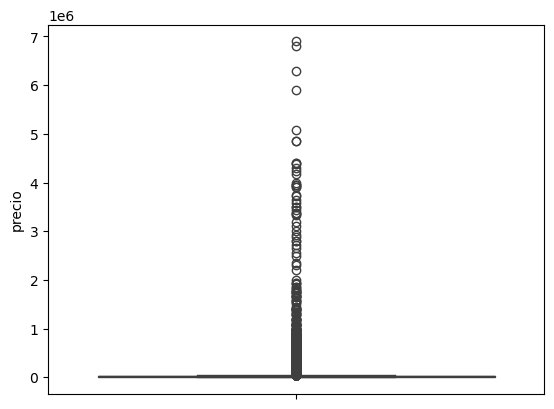

In [466]:
sns.boxplot(data = df_III, 
            y = "precio")

plt.show()

In [225]:
#Funcion que visualice columnas categóricas como barras, y un boxplot con la columna target
#y columnas númericas continuas como histograma, y scatterplot con la columna target

def vis(df, target, kind = "all", max_cols = 10, sample = 5000):

    if len(df) > sample:
        
        df_sample = df.sample(sample, random_state = 42)

    else:

        df_sample = df

    if kind == "numeric":
        
        cols = df_sample.select_dtypes(include = 'number').columns

    elif kind == 'categorical':
        
        cols = df_sample.select_dtypes(include = ['object', 'category']).columns

    else:
        
        cols = df_sample.columns

    cols = [col for col in cols if col != target][:max_cols]
    
    for i in cols:

        #if df_sample[i].dtype in ['object', 'category'] and df_sample[i].nunique() > 50:
            #continue

        plt.figure(figsize = (12, 5))

        if df_sample[i].dtype == 'object' or df_sample[i].dtype.name == 'category':

            plt.subplot(1, 2, 1)
            
            sns.countplot(x = i, 
                          data = df_sample)
            
            plt.title(f'{i}')

            plt.xticks(rotation = 45)

            plt.yticks(ticks=range(0, len(df_sample[i]), int(len(df_sample[i])/10)))

            plt.subplot(1, 2, 2)
            
            sns.boxplot(x = df_sample[i], 
                        y = target,
                       data = df_sample)

            plt.title(f'{target} vs {i}')

            plt.xticks(rotation = 45)

            #plt.yticks(ticks=range(0, len(df_sample[i]), int(len(df_sample[i])/10)))
            
        else:
            plt.subplot(1, 2, 1)
            
            sns.histplot(x = df_sample[i], 
                         kde = True, 
                         bins = 30,
                        data = df_sample)

            plt.title(f'{i}')

            #plt.yticks(ticks=range(0, len(df_sample[i]), int(len(df_sample[i])/10)))

            plt.subplot(1, 2, 2)
            
            sns.scatterplot(x = df_sample[i],
                            y = df_sample[target],
                           data = df_sample)

            plt.title(f'{target} vs {i}')

            #plt.yticks(ticks=range(0, len(df_sample[i]), int(len(df_sample[i])/10)))

        plt.tight_layout()

        plt.show()

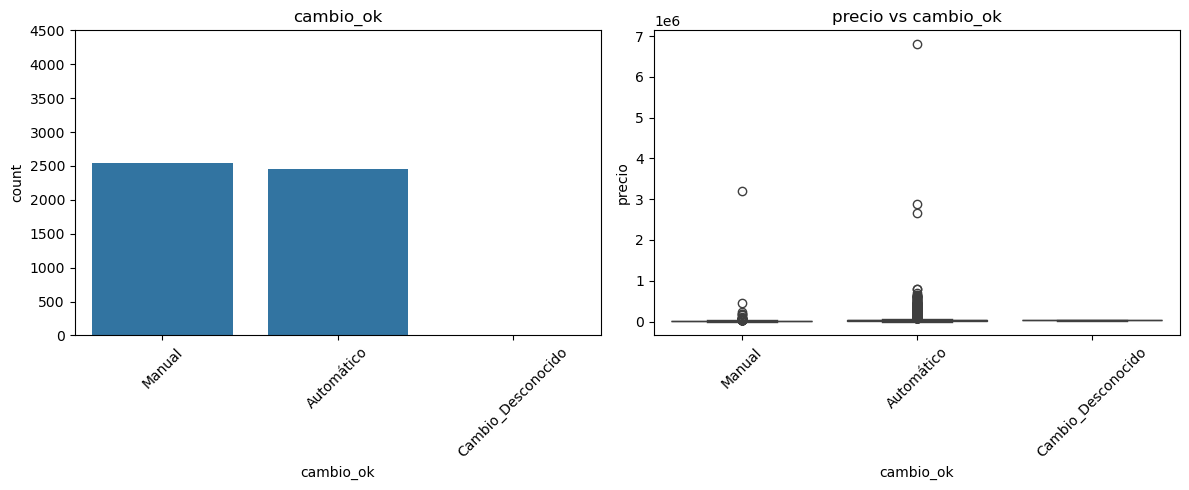

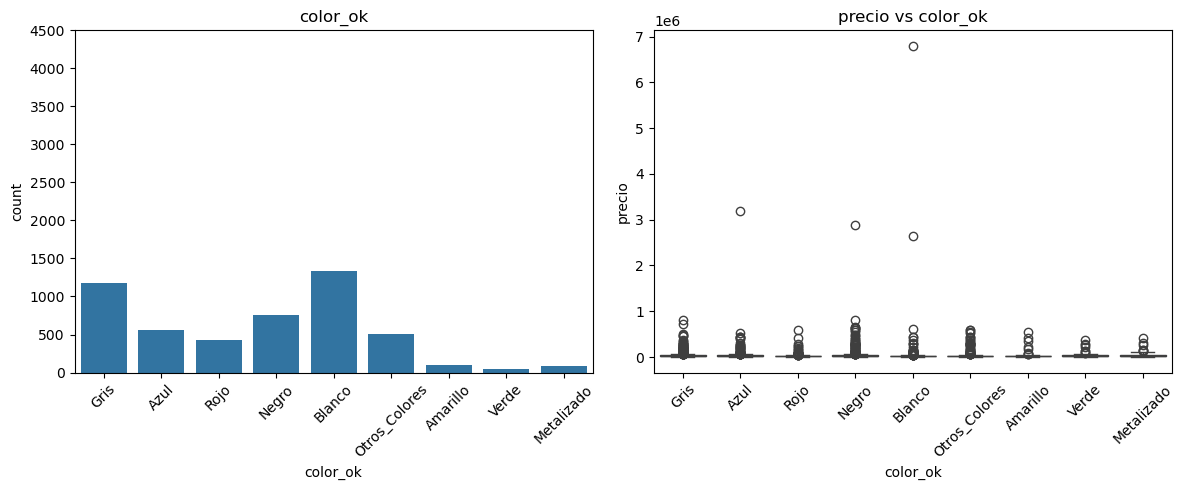

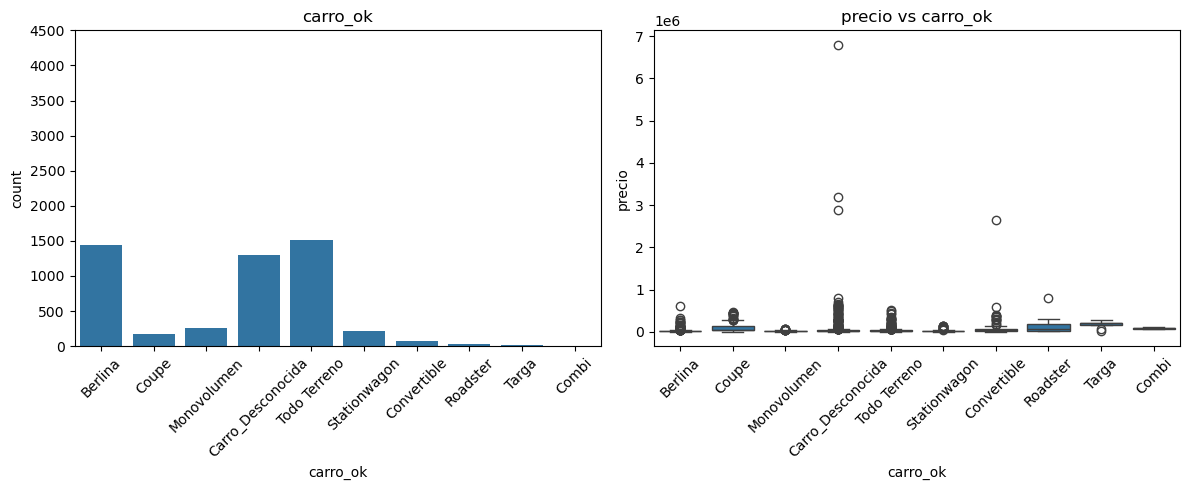

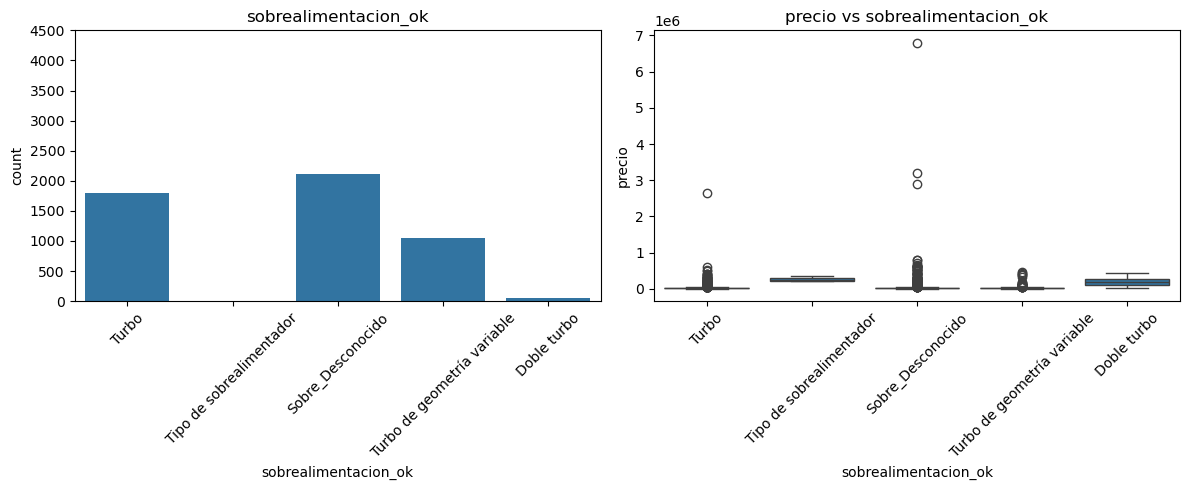

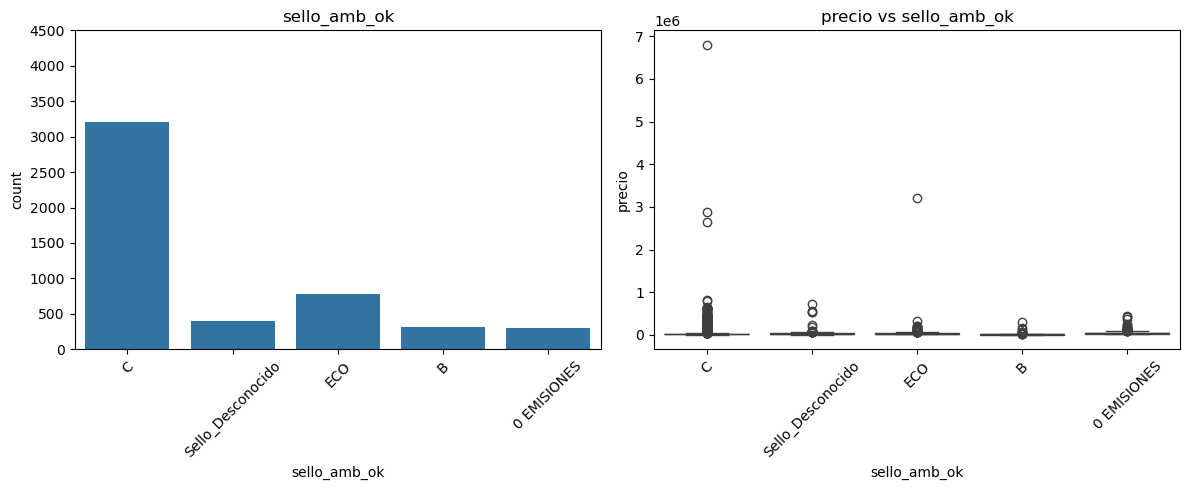

In [387]:
vis(df_III, target = "precio", kind = "categorical", max_cols = 26, sample = 5000)

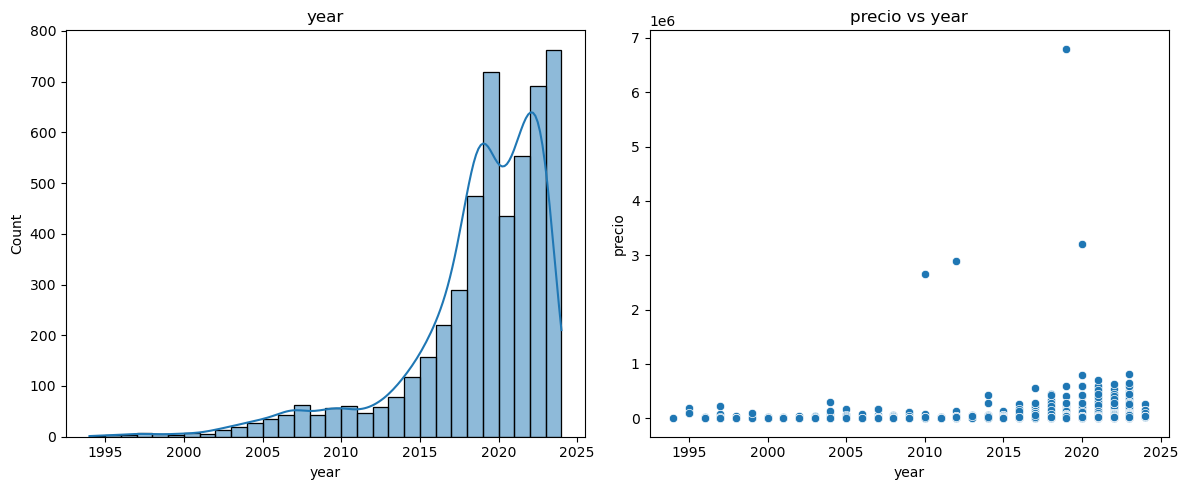

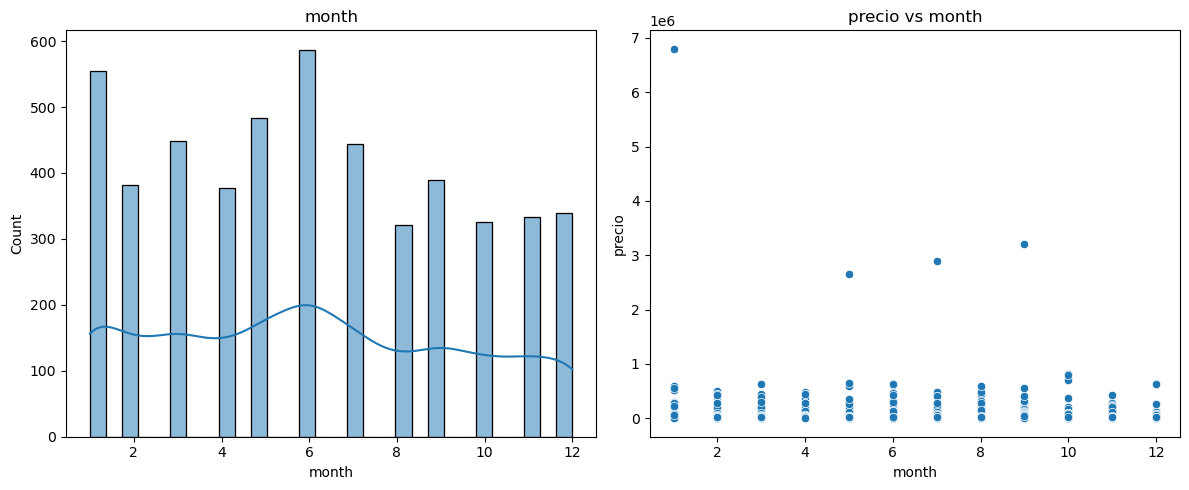

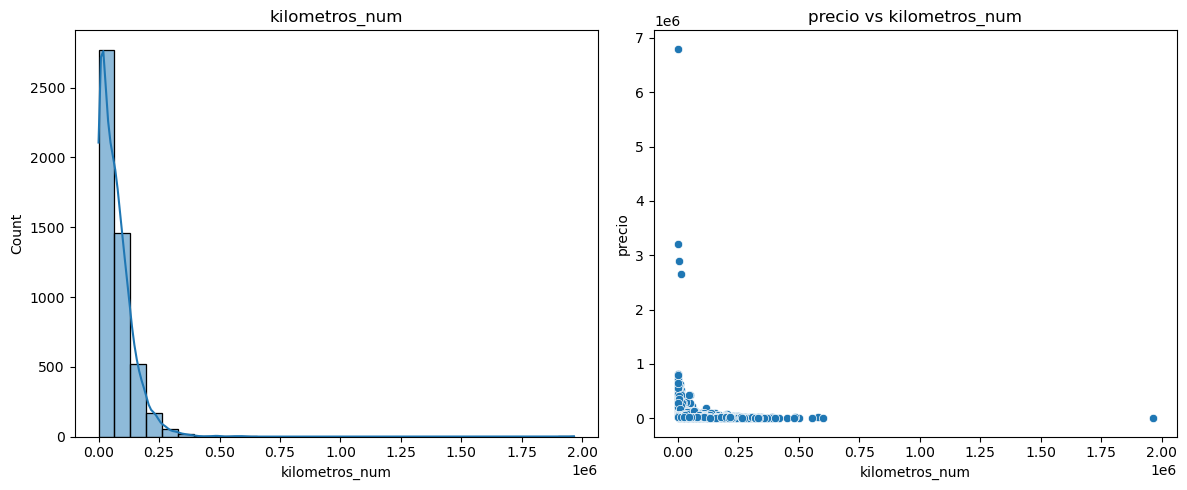

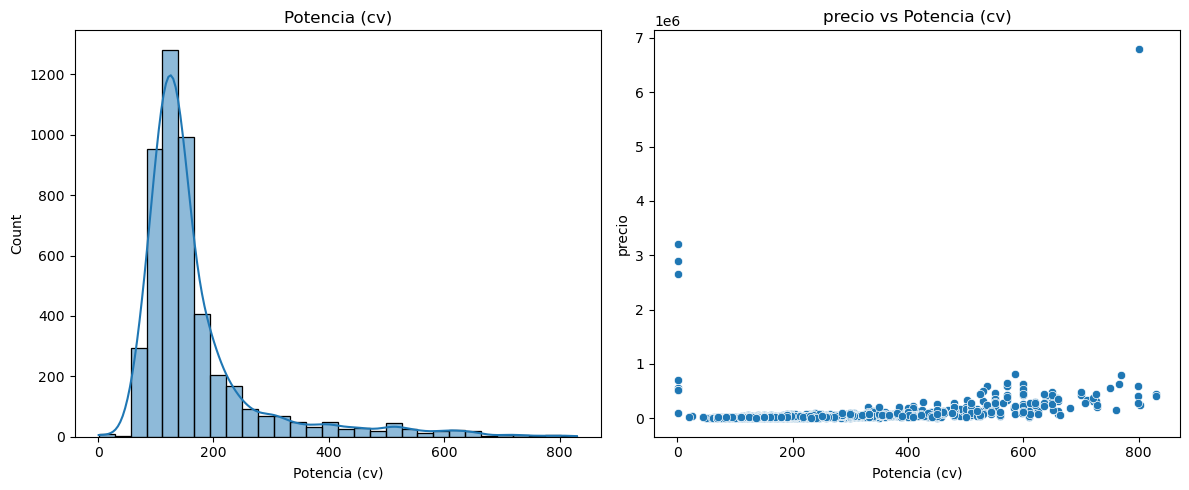

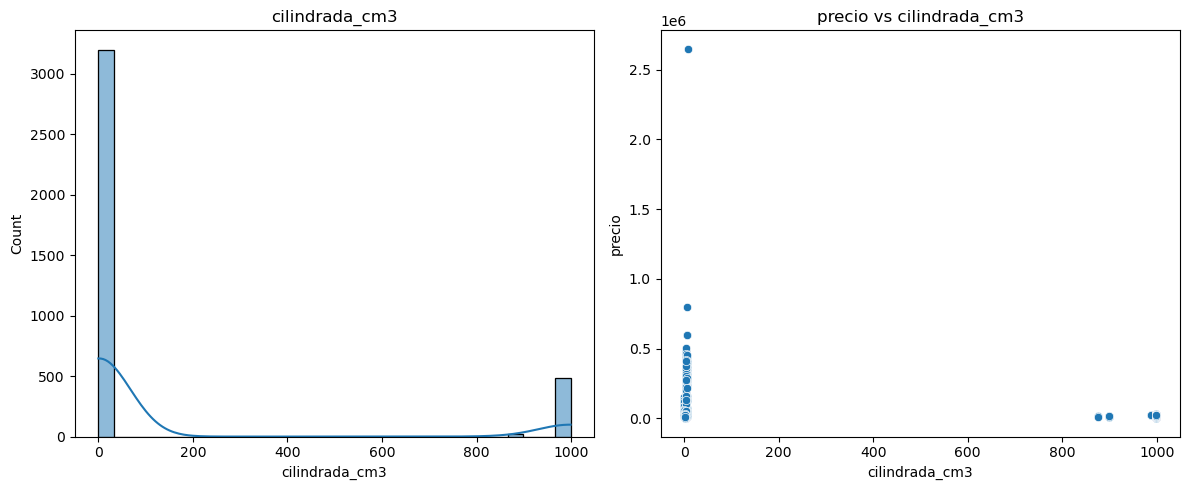

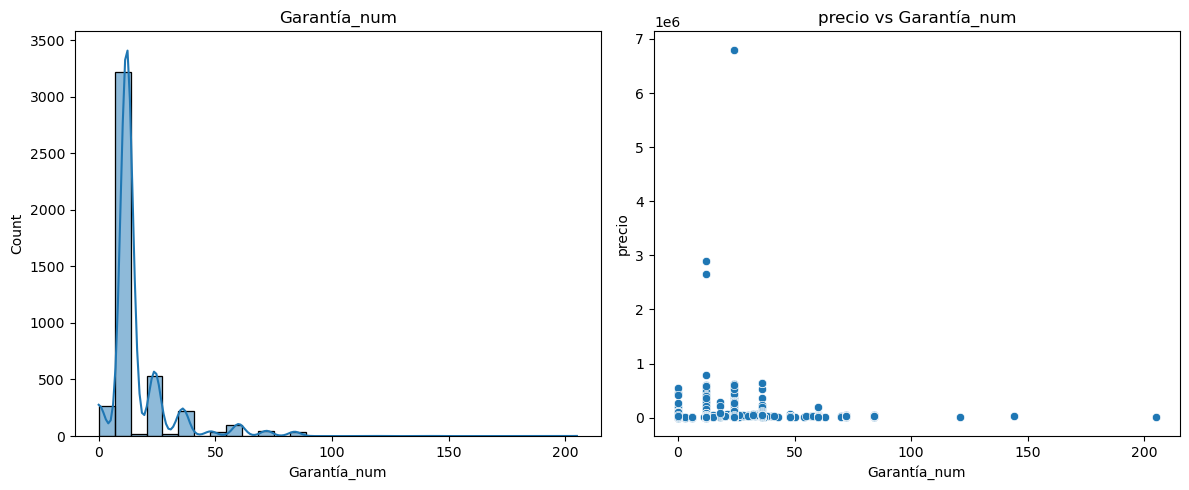

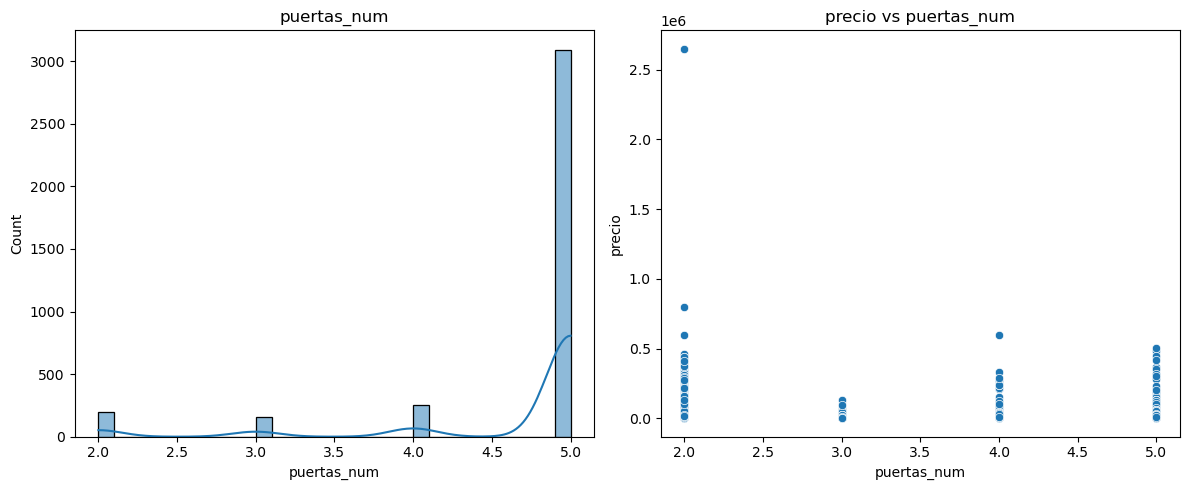

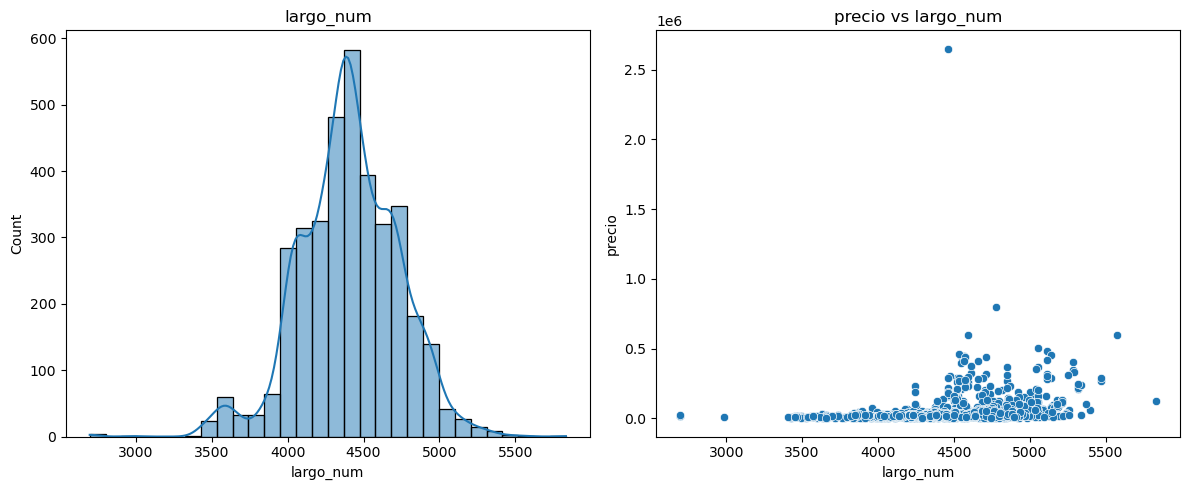

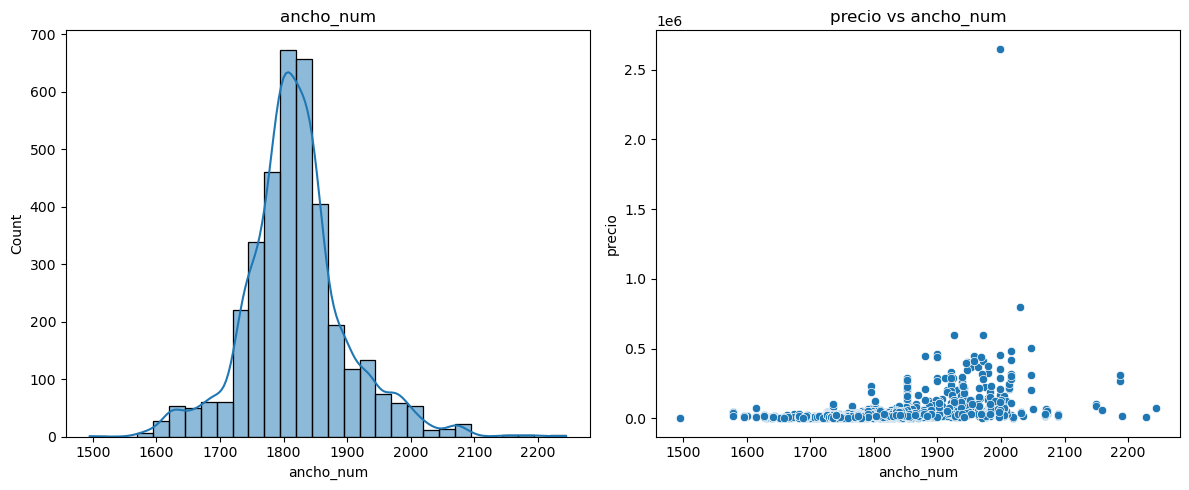

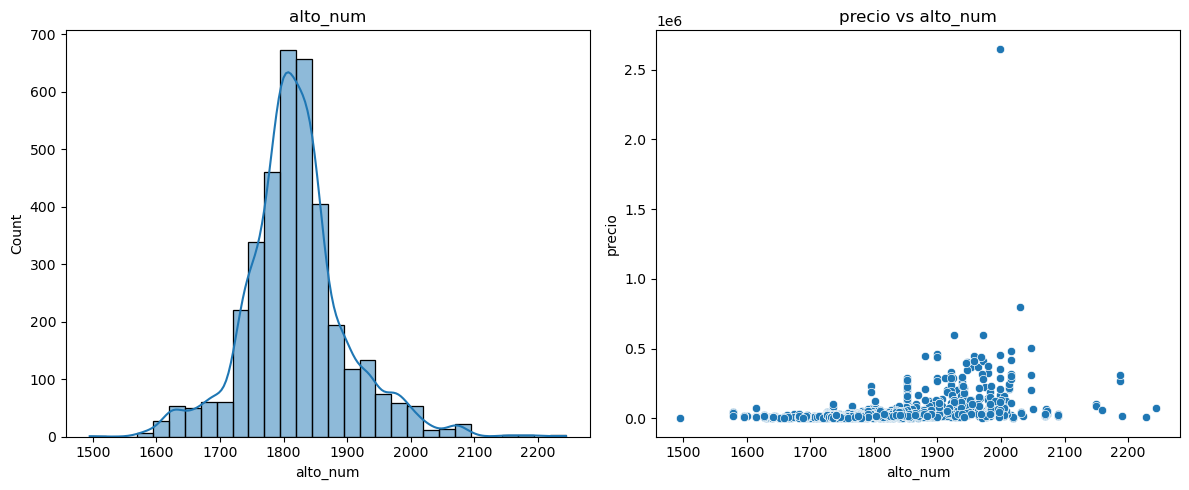

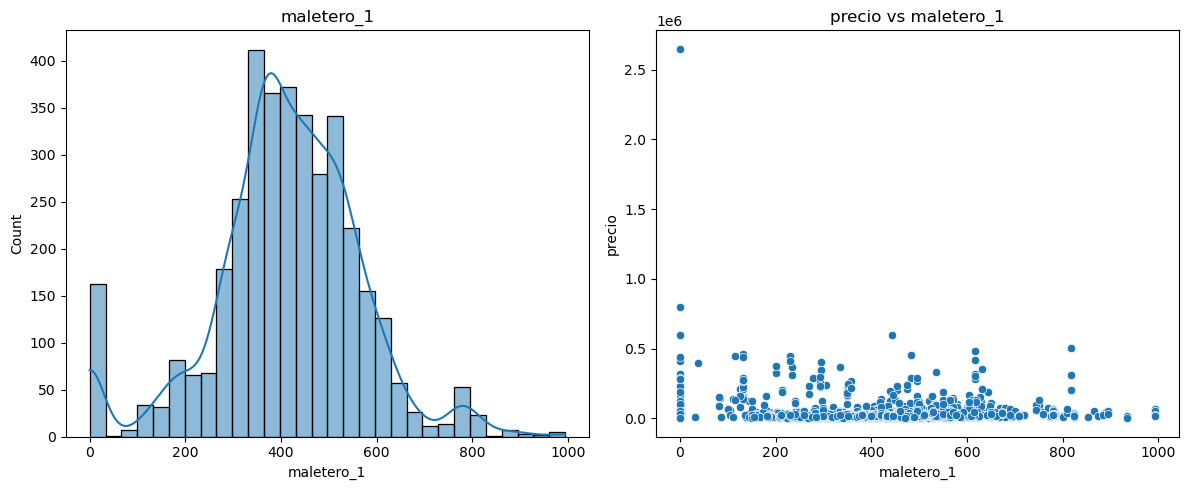

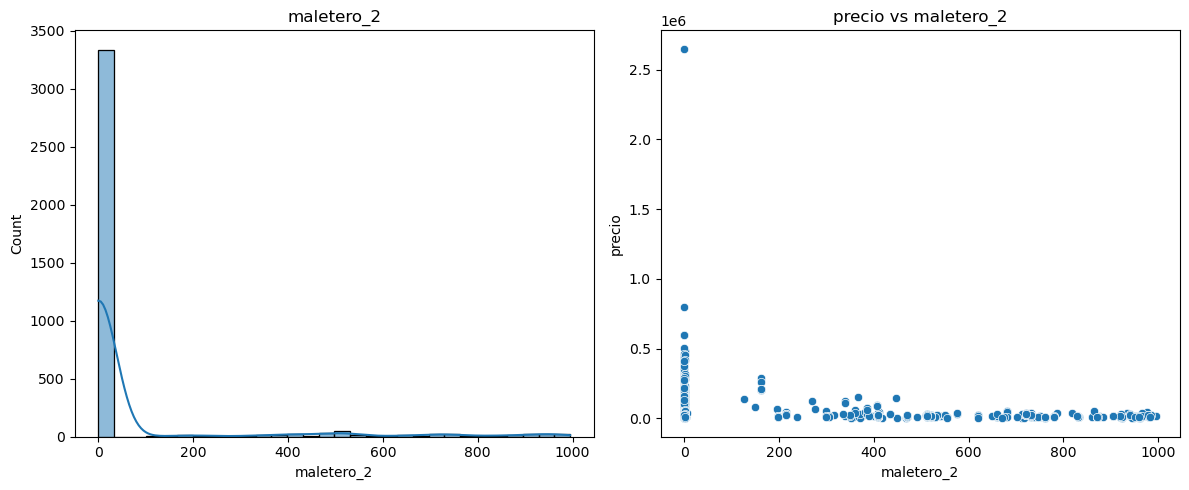

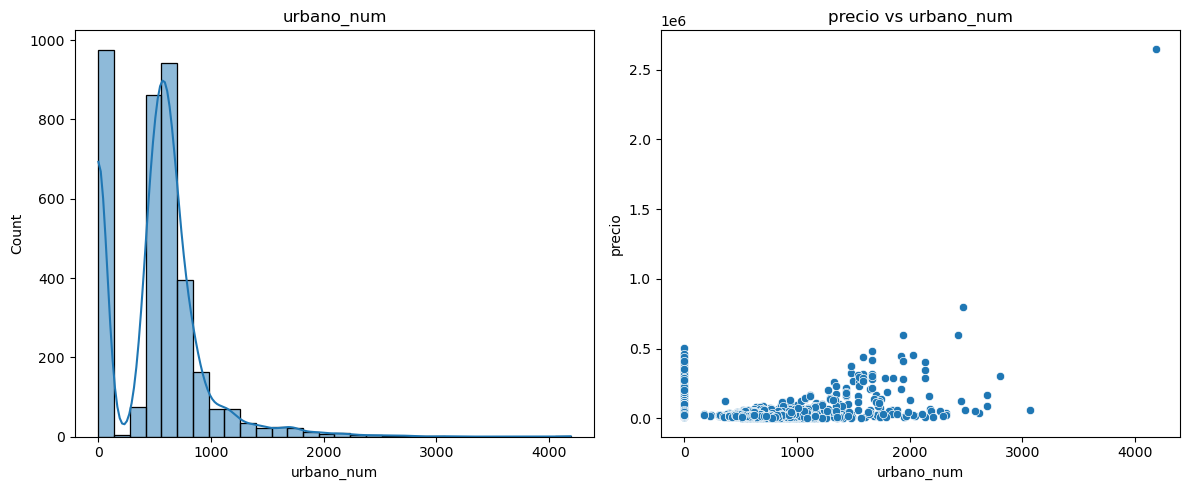

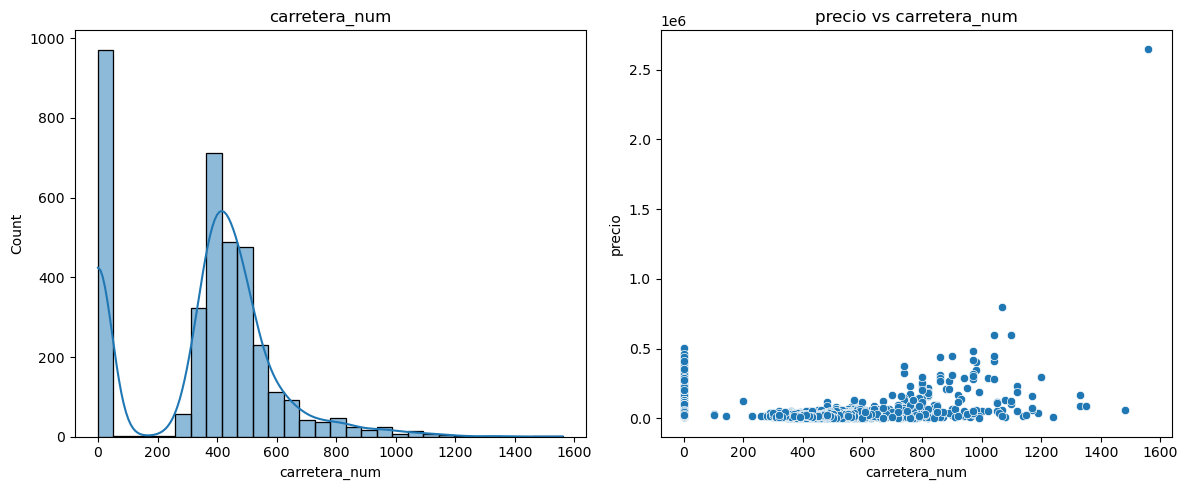

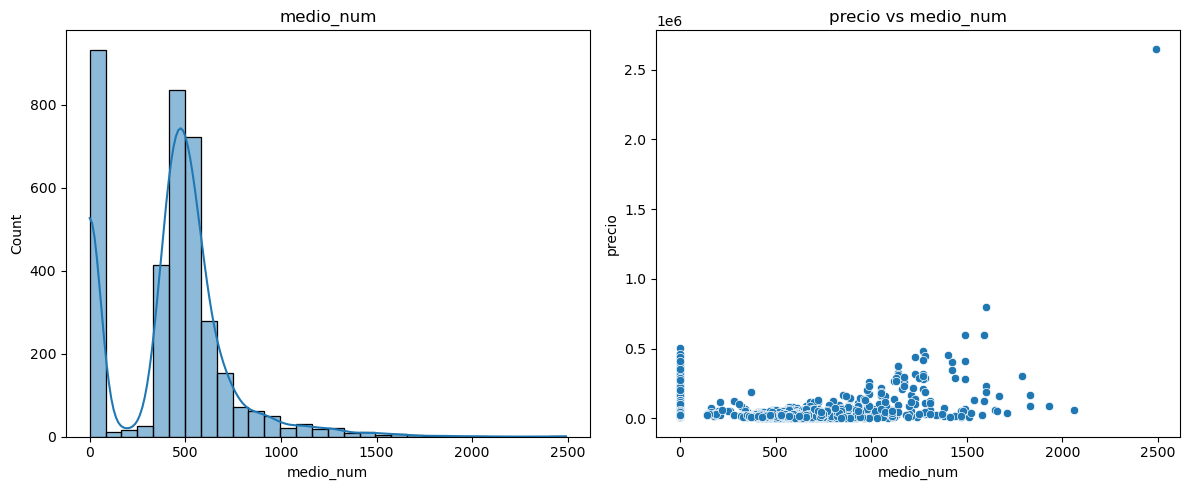

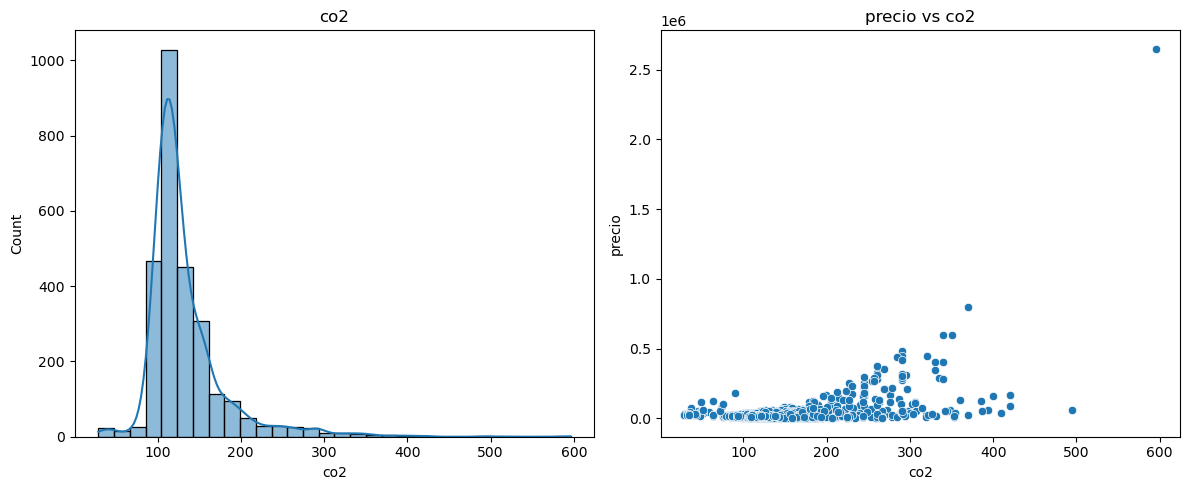

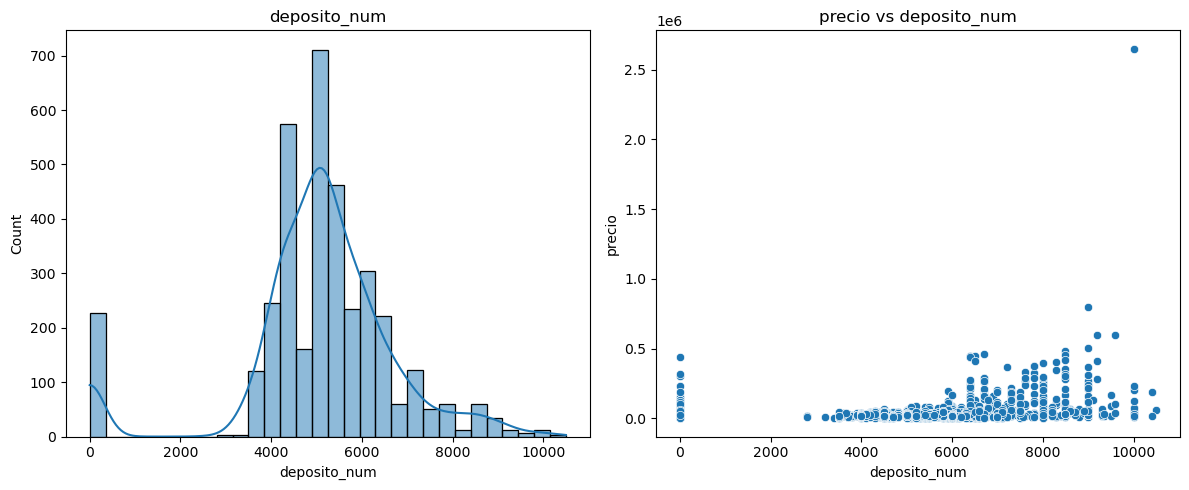

In [389]:
vis(df_III, target = "precio", kind = "numeric", max_cols = 26, sample = 5000)

## Missing Value Analysis

In [391]:
#Mean NA per column

df_III.isnull().mean()

year                    0.000000
month                   0.002726
kilometros_num          0.000000
cambio_ok               0.000000
Potencia (cv)           0.020043
cilindrada_cm3          0.261700
Garantía_num            0.099859
puertas_num             0.261700
color_ok                0.000000
largo_num               0.264445
ancho_num               0.262142
alto_num                0.262142
maletero_1              0.261700
maletero_2              0.261700
carro_ok                0.000000
sobrealimentacion_ok    0.000000
urbano_num              0.261700
carretera_num           0.261700
medio_num               0.261700
co2                     0.442512
sello_amb_ok            0.000000
deposito_num            0.261700
precio                  0.000000
dtype: float64

## Outlier Detection and Removal

In [393]:
def calculate_outlier_percentage_iqr(df, multiplier=1.5):
    """
    Calculate the percentage of outliers in specified columns using IQR method.
    
    Parameters:
    - df: pandas DataFrame
    - cols: list of numerical column names
    - multiplier: IQR multiplier (default 1.5 for mild outliers, 3.0 for extreme)
    
    Returns:
    - Dictionary with column names and their outlier percentages
    """
    outlier_info = {}
    total_rows = len(df)
    
    for col in df.columns:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lim_inf = Q1 - multiplier * IQR
            lim_sup = Q3 + multiplier * IQR
            
            # Identify outliers
            outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)][col]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / total_rows) * 100
            
            outlier_info[col] = {
                'outlier_count': outlier_count,
                'outlier_percentage': round(outlier_percentage, 2),
                'lower_bound': round(lim_inf, 2),
                'upper_bound': round(lim_sup, 2)
            }
        else:
            print(f"Skipping {col}: not in DataFrame or not numeric")
    
    return outlier_info

outlier_stats = calculate_outlier_percentage_iqr(df_III)

# Print results
print("Outlier Analysis (IQR Method):")
for col, stats in outlier_stats.items():
    print(f"{col}:")
    print(f"  Outliers: {stats['outlier_count']} ({stats['outlier_percentage']}%)")
    print(f"  IQR Bounds: [{stats['lower_bound']}, {stats['upper_bound']}]")

Skipping cambio_ok: not in DataFrame or not numeric
Skipping color_ok: not in DataFrame or not numeric
Skipping carro_ok: not in DataFrame or not numeric
Skipping sobrealimentacion_ok: not in DataFrame or not numeric
Skipping sello_amb_ok: not in DataFrame or not numeric
Outlier Analysis (IQR Method):
year:
  Outliers: 6192 (5.82%)
  IQR Bounds: [2009.5, 2029.5]
month:
  Outliers: 0 (0.0%)
  IQR Bounds: [-6.0, 18.0]
kilometros_num:
  Outliers: 3187 (3.0%)
  IQR Bounds: [-98745.0, 222447.0]
Potencia (cv):
  Outliers: 9489 (8.92%)
  IQR Bounds: [0.5, 292.5]
cilindrada_cm3:
  Outliers: 15417 (14.49%)
  IQR Bounds: [0.14, 3.75]
Garantía_num:
  Outliers: 25810 (24.26%)
  IQR Bounds: [12.0, 12.0]
puertas_num:
  Outliers: 12802 (12.04%)
  IQR Bounds: [5.0, 5.0]
largo_num:
  Outliers: 1793 (1.69%)
  IQR Bounds: [3578.5, 5254.5]
ancho_num:
  Outliers: 7265 (6.83%)
  IQR Bounds: [1667.0, 1963.0]
alto_num:
  Outliers: 7265 (6.83%)
  IQR Bounds: [1667.0, 1963.0]
maletero_1:
  Outliers: 5125 (4.82%

In [395]:
df_III.describe()

,Year,kilometros_num,Potencia (cv),cilindrada_cm3,Garantía_num,largo_num,ancho_num,alto_num,maletero_1,maletero_2,urbano_num,carretera_num,medio_num,co2,deposito_num,precio
count,106371.0,1.063710e+05,104239.000000,78534.000000,100571.000000,78242.000000,78487.000000,78487.000000,78534.000000,78534.000000,78534.000000,78534.000000,78534.000000,59300.000000,78534.000000,1.063710e+05
mean,2018.525209,7.159393e+04,167.586551,131.327217,18.201231,4396.695752,1818.078624,1818.078624,409.033765,62.498961,504.770418,351.194132,414.045000,130.655177,5114.965875,3.515440e+04
std,4.453106,6.672891e+04,107.341274,333.921890,411.602671,328.547060,78.580184,78.580184,154.175227,198.097414,386.891525,237.532976,290.469202,43.657949,1676.423778,1.031810e+05
min,1994.0,0.000000e+00,1.000000,0.000000,0.000000,2337.000000,1237.000000,1237.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1.000000e+00
25%,2017.0,2.170100e+04,110.000000,1.497000,12.000000,4207.000000,1778.000000,1778.000000,335.000000,0.000000,0.000000,0.000000,210.000000,107.000000,4500.000000,1.490000e+04
50%,2019.0,5.800000e+04,136.000000,1.896000,12.000000,4394.000000,1814.000000,1814.000000,410.000000,1.237000,540.000000,400.000000,460.000000,119.000000,5000.000000,2.100000e+04
75%,2022.0,1.020000e+05,183.000000,2.400000,12.000000,4626.000000,1852.000000,1852.000000,505.000000,1.591000,670.000000,480.000000,550.000000,143.000000,6000.000000,3.090000e+04
max,2024.0,3.400000e+06,963.000000,999.000000,122412.000000,6165.000000,2244.000000,2244.000000,994.000000,999.000000,4190.000000,1560.000000,2490.000000,596.000000,12100.000000,6.900000e+06


In [417]:
# Columnas categoricas para retiro de outliers

num_cols = df_III.select_dtypes(include=["Int64", "float64"]).columns

# Step 1: Calculate Q1, Q3, and IQR for each numeric column
Q1 = df_III[num_cols].quantile(0.25)
Q3 = df_III[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outliers as values outside 1.5 * IQR
# We'll use `.any(axis=1)` to remove any row that has at least one outlier
is_outlier = ((df_III[num_cols] < (Q1 - 3 * IQR)) | (df_III[num_cols] > (Q3 + 3 * IQR)))

# Step 3: Keep only the rows that have no outliers
df_clean = df_III[~is_outlier.any(axis=1)]

#Siempre resetear los indices luego de filtrar

df_clean.reset_index(drop=True)

#Si usas Z-score cuando la distribución no es normal, te barre con todo.

,year,month,kilometros_num,cambio_ok,Potencia (cv),cilindrada_cm3,Garantía_num,puertas_num,color_ok,largo_num,...,maletero_2,carro_ok,sobrealimentacion_ok,urbano_num,carretera_num,medio_num,co2,sello_amb_ok,deposito_num,precio
0,2023,2,3900.0,Manual,179.0,NaN,12.0,NaN,Negro,NaN,...,NaN,Carro_Desconocida,Sobre_Desconocido,NaN,NaN,NaN,NaN,C,NaN,29000.0
1,2023,1,10.0,Manual,180.0,NaN,12.0,NaN,Blanco,NaN,...,NaN,Carro_Desconocida,Sobre_Desconocido,NaN,NaN,NaN,NaN,C,NaN,28880.0
2,2023,1,10.0,Manual,180.0,NaN,12.0,NaN,Rojo,NaN,...,NaN,Carro_Desconocida,Sobre_Desconocido,NaN,NaN,NaN,NaN,C,NaN,28880.0
3,2023,1,10.0,Manual,180.0,NaN,12.0,NaN,Rojo,NaN,...,NaN,Carro_Desconocida,Sobre_Desconocido,NaN,NaN,NaN,NaN,C,NaN,28880.0
4,2023,1,10.0,Manual,180.0,NaN,12.0,NaN,Gris,NaN,...,NaN,Carro_Desconocida,Sobre_Desconocido,NaN,NaN,NaN,NaN,C,NaN,28880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55600,2022,5,26761.0,Automático,390.0,1.969,12.0,5.0,Azul,4950.0,...,0.0,Todo Terreno,Turbo,0.0,0.0,210.0,48.0,0 EMISIONES,7000.0,68900.0
55601,2021,1,60000.0,Automático,390.0,1.969,NaN,5.0,Metalizado,4950.0,...,0.0,Todo Terreno,Turbo,0.0,0.0,210.0,48.0,0 EMISIONES,7000.0,56000.0
55602,2021,2,66070.0,Automático,390.0,1.969,12.0,5.0,Gris,4950.0,...,0.0,Todo Terreno,Turbo,0.0,0.0,210.0,48.0,0 EMISIONES,7000.0,67900.0
55603,2020,12,31800.0,Automático,390.0,1.969,12.0,5.0,Azul,4950.0,...,0.0,Todo Terreno,Turbo,0.0,0.0,210.0,48.0,0 EMISIONES,7000.0,61500.0


In [397]:
df_III.shape

(106370, 23)

In [399]:
df_clean.shape

(45833, 23)

In [401]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45833 entries, 0 to 106378
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  45833 non-null  Int64  
 1   month                 45762 non-null  Int64  
 2   kilometros_num        45833 non-null  float64
 3   cambio_ok             45833 non-null  object 
 4   Potencia (cv)         44640 non-null  float64
 5   cilindrada_cm3        29679 non-null  float64
 6   Garantía_num          41237 non-null  float64
 7   puertas_num           29679 non-null  float64
 8   color_ok              45833 non-null  object 
 9   largo_num             29679 non-null  float64
 10  ancho_num             29679 non-null  float64
 11  alto_num              29679 non-null  float64
 12  maletero_1            29679 non-null  float64
 13  maletero_2            29679 non-null  float64
 14  carro_ok              45833 non-null  object 
 15  sobrealimentacion_ok  4

## Feature Engineering and Encoding

In [419]:
def encoder(df, col):
    df_encoded = df.copy() #Work with a copy to avoid modifying original
    
    for i in col:
        if i not in df.columns:
            print(f"Warning: Column '{i}' not found in DataFrame")
            continue

        #Get unique values for column naming
        unique_values = df_encoded[i].dropna().unique()
            
        #Initialize encoder
        encoder = OneHotEncoder(sparse_output = False, drop='first')
        
        #Fit and transform the column
        encoded_array = encoder.fit_transform(df[[i]])

        #Create clean column names (remove the original column prefix)

        clean_names = [f"{i}_{val}" for val in encoder.categories_[0][1:]]
        
        #Create DataFrame with encoded columns
        encoded_cols = pd.DataFrame(encoded_array, 
                                    columns=clean_names,
                                    index=df_encoded.index)

        #Concatenate with original Dataframe and drop original column
        df_encoded = pd.concat([df_encoded, encoded_cols], axis=1).drop(columns=[i])
        
    return df_encoded


categorical_cols = ['cambio_ok', 'carro_ok', 'color_ok', 'sobrealimentacion_ok', 'sello_amb_ok']
df_encoded = encoder(df_clean, categorical_cols)

In [405]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45833 entries, 0 to 106378
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   year                                              45833 non-null  Int64  
 1   month                                             45762 non-null  Int64  
 2   kilometros_num                                    45833 non-null  float64
 3   Potencia (cv)                                     44640 non-null  float64
 4   cilindrada_cm3                                    29679 non-null  float64
 5   Garantía_num                                      41237 non-null  float64
 6   puertas_num                                       29679 non-null  float64
 7   largo_num                                         29679 non-null  float64
 8   ancho_num                                         29679 non-null  float64
 9   alto_num             

In [421]:
# Drop non-numeric columns
df_encoded = df_encoded.select_dtypes(include=['number'])

df_encoded.columns = df_encoded.columns.astype(str)

scaler = MinMaxScaler()
scaler.set_output(transform="pandas")
df_scaled = scaler.fit_transform(df_encoded)

## Missing Value Imputation

In [423]:
#Impute NA

imputer = KNNImputer(n_neighbors = 3)

imputer.set_output(transform = 'pandas')

df_imputed = imputer.fit_transform(df_scaled)

In [411]:
df_imputed.isnull().mean()

year                                                0.0
month                                               0.0
kilometros_num                                      0.0
Potencia (cv)                                       0.0
cilindrada_cm3                                      0.0
Garantía_num                                        0.0
puertas_num                                         0.0
largo_num                                           0.0
ancho_num                                           0.0
alto_num                                            0.0
maletero_1                                          0.0
maletero_2                                          0.0
urbano_num                                          0.0
carretera_num                                       0.0
medio_num                                           0.0
co2                                                 0.0
deposito_num                                        0.0
precio                                          

In [425]:
#Reinvertir lo escalado post imputacion

# Invertimos el escalado
# inverse_transform siempre retorna un array de numpy, por lo que debemos recomponer el dataframe de manera
# manual.

data = scaler.inverse_transform(df_imputed)
df_imputed = pd.DataFrame(data, columns=df_imputed.columns)
df_imputed

,year,month,kilometros_num,Potencia (cv),cilindrada_cm3,Garantía_num,puertas_num,largo_num,ancho_num,alto_num,...,sobrealimentacion_ok_Compresor y turbo,sobrealimentacion_ok_Doble turbo,sobrealimentacion_ok_Sobre_Desconocido,sobrealimentacion_ok_Tipo de sobrealimentador,sobrealimentacion_ok_Turbo,sobrealimentacion_ok_Turbo de geometría variable,sello_amb_ok_B,sello_amb_ok_C,sello_amb_ok_ECO,sello_amb_ok_Sello_Desconocido
0,2023.0,2.0,3900.0,179.0,1.199,12.0,5.0,4160.666667,1787.333333,1787.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2023.0,1.0,10.0,180.0,1.199,12.0,5.0,4263.000000,1816.333333,1816.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2023.0,1.0,10.0,180.0,1.199,12.0,5.0,4056.666667,1751.666667,1751.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2023.0,1.0,10.0,180.0,1.199,12.0,5.0,4056.666667,1751.666667,1751.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2023.0,1.0,10.0,180.0,1.199,12.0,5.0,4367.000000,1852.000000,1852.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55600,2022.0,5.0,26761.0,390.0,1.969,12.0,5.0,4950.000000,2008.000000,2008.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55601,2021.0,1.0,60000.0,390.0,1.969,12.0,5.0,4950.000000,2008.000000,2008.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55602,2021.0,2.0,66070.0,390.0,1.969,12.0,5.0,4950.000000,2008.000000,2008.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55603,2020.0,12.0,31800.0,390.0,1.969,12.0,5.0,4950.000000,2008.000000,2008.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


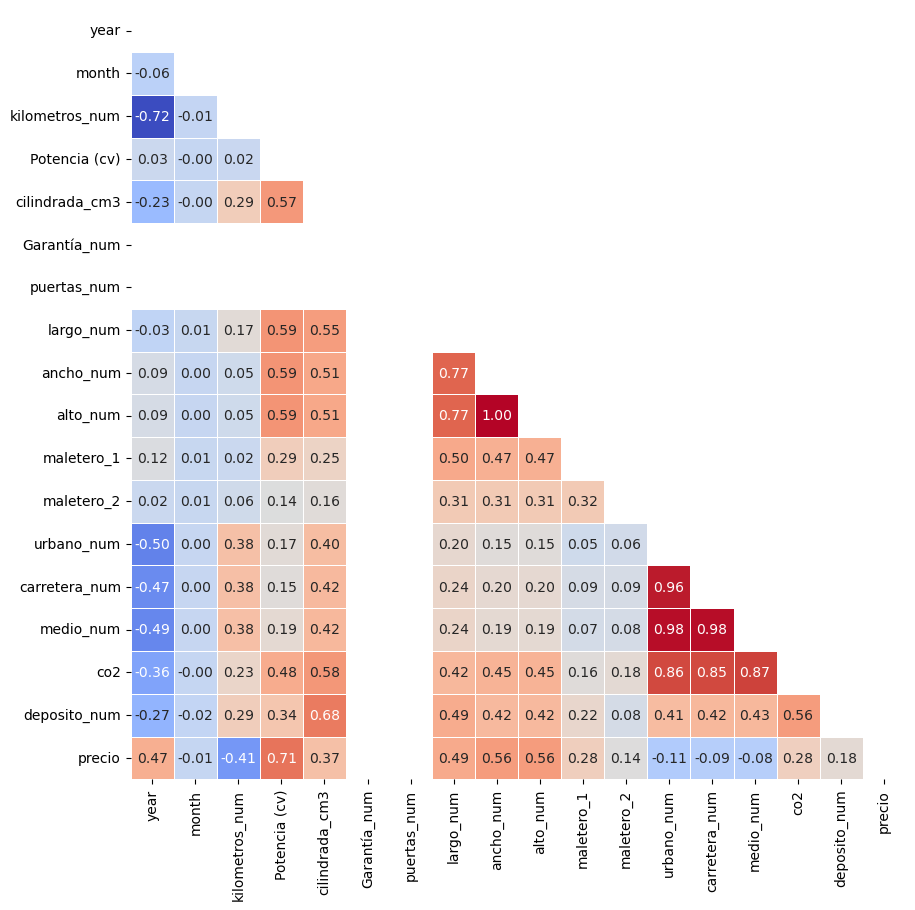

In [427]:
#Heatmap cuantitativas
num = df_clean.select_dtypes(include=['float64', 'int64'])

cor = num.corr()

mask = np.triu(np.ones_like(cor, dtype = bool))

plt.figure(figsize=(10, 10))
sns.heatmap(cor, 
            annot = True, 
             cmap = "coolwarm", 
              fmt = ".2f", 
             mask = mask, 
       linewidths = 0.5, 
             cbar = False)
plt.show()

## Feature Importance and Final Selection

X: (55605, 44)
y: (55605,)
Feature Importance:
 1. feature  0 (  0.5323859573893369): Potencia (cv)
 2. feature  1 (  0.2170855224298572): year
 3. feature  2 ( 0.07001044995400571): kilometros_num
 4. feature  3 (  0.0200875431912197): ancho_num
 5. feature  4 (0.019302046860462878): alto_num
 6. feature  5 (0.015618614891590764): largo_num
 7. feature  6 (0.015294405030955038): deposito_num
 8. feature  7 (0.013874860160048593): cilindrada_cm3
 9. feature  8 (0.013054760442732688): co2
10. feature  9 (0.011566799253943836): maletero_1
11. feature 10 (0.010078690052247444): carretera_num
12. feature 11 (0.009708502493743545): month
13. feature 12 (0.009414348894030594): cambio_ok_Manual
14. feature 13 ( 0.00831297771692767): maletero_2
15. feature 14 ( 0.00556029612830459): urbano_num
16. feature 15 (0.005147776642427619): medio_num
17. feature 16 (0.0038557381578429683): sello_amb_ok_Sello_Desconocido
18. feature 17 (0.0024746660774270066): carro_ok_Todo Terreno
19. feature 18 (0.002

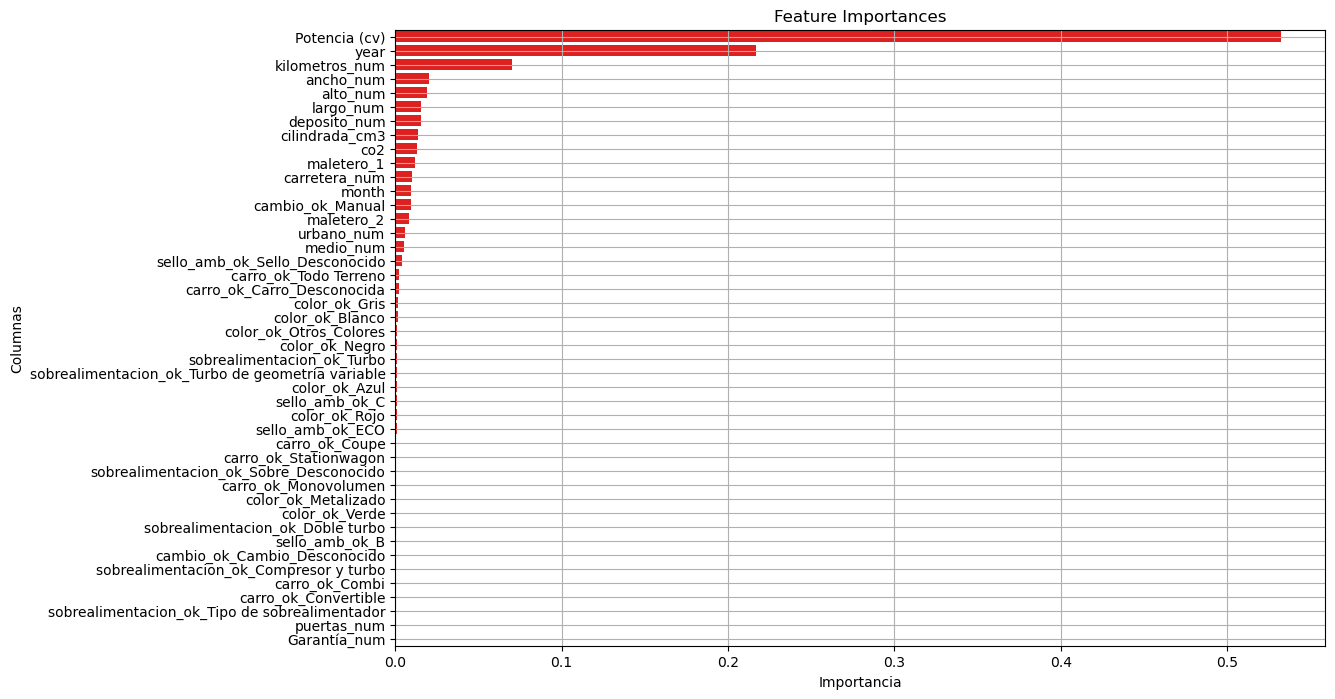

In [429]:
X = df_imputed.drop(["precio"], axis = 1)
y = df_imputed["precio"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

df_importances = pd.DataFrame(data = zip(X.columns, importances),
                              columns = ["Columnas", "Importancia"])

df_importances = df_importances.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df_importances.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df_importances["Importancia"], y = df_importances["Columnas"], color = "red")

plt.grid()
plt.show()

In [431]:
#Select important features
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_  # from your RandomForest
}).sort_values('importance', ascending=False)

# Keep top 15 features
top_15_features = feature_importance_df.head(15)['feature'].tolist()
top_15_features.append('precio')  # Add target

df_top = df_imputed[top_15_features]

In [433]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Potencia (cv)     55605 non-null  float64
 1   year              55605 non-null  float64
 2   kilometros_num    55605 non-null  float64
 3   ancho_num         55605 non-null  float64
 4   alto_num          55605 non-null  float64
 5   largo_num         55605 non-null  float64
 6   deposito_num      55605 non-null  float64
 7   cilindrada_cm3    55605 non-null  float64
 8   co2               55605 non-null  float64
 9   maletero_1        55605 non-null  float64
 10  carretera_num     55605 non-null  float64
 11  month             55605 non-null  float64
 12  cambio_ok_Manual  55605 non-null  float64
 13  maletero_2        55605 non-null  float64
 14  urbano_num        55605 non-null  float64
 15  precio            55605 non-null  float64
dtypes: float64(16)
memory usage: 6.8 MB


## Save dataset

In [ ]:
df_top.to_csv("...\autocasion_procesado.csv", index = False)

### Part I Insights

Correlations and Patterns

- Heatmap Insights: Strong positive correlations with precio: Potencia (higher power = higher price), year from Fecha (newer = pricier), plazas/puertas (larger/family cars). Negative: Kilómetros (more mileage = lower price), consumo/co2 (efficient/low-emission = higher price, but tied to fuel type).
- Outliers: Using Tukey's, expect outliers in precio (>€100k luxury), kilómetros (>200k km old cars), potencia (>300 cv sports). Samples show low-km classics as high-price outliers.
- Other Patterns: Electric/hybrid shift in recent years (more "0 EMISIONES" post-2020). Larger dimensions link to higher prices (SUVs vs. compacts). Multi-modal distributions in consumption due to fuel types.

Feature Importance

- Top Features: Year, Kilómetros, Potencia, Combustible, Distintivo ambiental.
- Moderate Features: Cambio, Dimensions, Consumo/CO2.
- Low Impact: Garantía, Color, Maletero, Cilindros, Sobrealimentacion.
- Expected Rankings (approximate):
    Year: ~0.25–0.35
    Kilómetros: ~0.15–0.25
    Potencia: ~0.10–0.20
    Combustible (encoded): ~0.05–0.15
    Others: <0.10 each

# Part II

- Data Splitting: Splits data into features (X) and target (precio) with an 80-20 train-test split (random_state=42).
- Model Evaluation: Trains multiple regression models (e.g., RandomForest, LinearRegression, Gradient Boosting) and compares them using MAE, MSE, and R².
- Scaler Application: Applies MinMaxScaler to normalize features and target, improving model performance.

## Model Training Preparation

In [ ]:
df = pd.read_csv("...\autocasion_procesado.csv")

df.head(3)

In [435]:
# X es la variable explicativa 
# y es la variable destino o variable objetivo

X = np.array(df_top.drop(["precio"], axis = 1)) # El modelo nos pide que utilicemos una matriz para entrenar.
y = np.array(df_top["precio"])

X.shape, y.shape

((55605, 15), (55605,))

In [437]:
#2. Definir el subconjunto de entrenamiento y validación
#Random state hace que el código sea reproducible. Siempre será el mismo train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((44484, 15), (44484,))
Conjunto de Test: ((11121, 15), (11121,))


## Feature Scaling for Models

In [439]:
from sklearn.preprocessing import MinMaxScaler

# Escalado de datos
# Es necesario para el algoritmo KNN que todos los datos se encuentren en la misma escala.
# De esta manera, el algoritmo puede evaluar cada columna o dimensión de manera equitativa.

# IMPROTANTE: Hacemos fit solo con los datos de train. Más adelante transformaremos los datos de test sin fit.

from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler() #escalado 0 a 1 = (x - xmin)/(xmax - xmin)
X_train_scaled = x_scaler.fit_transform(X_train)  #Solo ejecutar una vez!
X_test_scaled = x_scaler.transform(X_test)

#fit determina cual es valor de xmin y xmax
#transform opera

In [441]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

## Model Comparison

In [443]:
results = []

models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors = 4),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled.ravel())  # Train the model
    predictions_scaled = model.predict(X_test_scaled)  # Make predictions

    predictions = y_scaler.inverse_transform(predictions_scaled.reshape(-1, 1))
    y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_original, predictions)
    mse = mean_squared_error(y_test_original, predictions)
    r2 = r2_score(y_test_original, predictions)

    # Append results to list
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R²": round(r2, 4)
    })

# Create DataFrame
comparison_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)

In [445]:
comparison_df

,Model,MAE,MSE,R²
3,Random Forest,2041.39,12227134.94,0.9057
1,KNN Regressor,2750.50,19245148.31,0.8516
6,Gradient Boosting,3005.49,20196247.95,0.8442
4,SVR,3488.30,22287928.99,0.8281
2,Decision Tree,2631.44,23421602.30,0.8194
0,Linear Regression,3871.12,31545261.13,0.7567
5,AdaBoost,8489.78,97688654.34,0.2466


### Part II Insights

- An R² of 0.8177 indicates that approximately 81.77% of the variance in car prices is explained by the model. This is a strong result for a regression task, especially for a used car dataset with diverse features (e.g., year, mileage, power, fuel type).
- The score suggests the model captures key price drivers well (e.g., year, kilometers, power, as noted in feature importance insights), but ~18% of variance remains unexplained, possibly due to unmodeled factors (e.g., brand reputation, specific model popularity, or regional market differences not in the dataset).
- Compared to typical benchmarks for car price prediction, 0.8177 is robust (literature often reports R² of 0.75–0.90 for similar tasks), reflecting good generalization across the dataset's heterogeneity (e.g., electric vs. gas, new vs. old cars).
- Given precio ranges from ~€12,490 to €209,900 (with most cars ~€20k–€60k), a strong R² of 0.8177 suggests MAE is relatively low, likely in the range of €2,000–€5,000 (based on typical car price models with similar R²).
- An MAE of, say, €3,000 means the model’s predictions are, on average, €3,000 off the true price. For a €30,000 car, this is a ~10% error, which is reasonable for practical applications (e.g., pricing estimates on a car sales platform).
- MAE’s robustness to outliers (e.g., luxury cars at €209k) makes it a reliable metric for this dataset, where high-price outliers exist. The preprocessing (outlier handling via Tukey’s or Z-Score, KNN imputation) likely minimized extreme errors.

# Part III

- Data Sampling: Uses a 30% random sample (random_state=42) to reduce computational load for tuning.
- GridSearchCV Tuning: Optimizes RandomForestRegressor (and optionally XGBRegressor) with a parameter grid, evaluating MAE, MSE, and R².
- Model Alternative : XGBRegressor

## Hyperparameter Tuning and final model

In [447]:
# Define the model
r = RandomForestRegressor()

# Define parameter grid
param_grid = {
    "criterion": ["absolute_error", "squared_error"],
    "n_estimators": [150, 200, 250],
    "max_depth": [6, 7, 8],
    "max_features": ["sqrt"],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=r,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Could also use 'neg_mean_squared_error' or 'neg_mean_absolute_error'
    n_jobs=-1,     # Use all cores
    verbose=2
)

# Convert to DataFrame/Series so you can sample
X_train_df = pd.DataFrame(X_train_scaled)
y_train_df = pd.Series(y_train_scaled.ravel())

# Take a random 30% sample of the training data
X_tune = X_train_df.sample(frac=0.3, random_state=42)
y_tune = y_train_df.loc[X_tune.index]

# Fit on the scaled training set
grid_search.fit(X_tune, y_tune.ravel())

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", round(grid_search.best_score_, 4))

C:\Users\User\AppData\Local\Temp\ipykernel_14356\1566855043.py:33: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_tune, y_tune.ravel())


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best R² Score: 0.8177


In [449]:
# Training R²
y_train_pred = grid_search.best_estimator_.predict(X_train_scaled)
print("Training R²:", r2_score(y_train_scaled, y_train_pred))

# Validation R² (cross-validation)
print("Best CV R²:", grid_search.best_score_)

Training R²: 0.8341077442488859
Best CV R²: 0.8176581845067961


## Model Alternative

In [459]:
xgb = XGBRegressor()
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_tune, y_tune.ravel())

C:\Users\User\AppData\Local\Temp\ipykernel_14356\736955566.py:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_xgb.fit(X_tune, y_tune.ravel())


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [461]:
# Best parameters and score
print("Best Parameters:", grid_xgb.best_params_)
print("Best R² Score:", round(grid_xgb.best_score_, 4))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best R² Score: 0.8758


In [553]:
best_model = grid_xgb.best_estimator_

### Part III Insights:

- The RandomForest is suitable for automated pricing tools, but errors in high-end or niche vehicles suggest human oversight for outliers. The XGBRegressor (R²=0.8758) might be preferred for final deployment due to its superior performance.

## Save Model

In [555]:
with open("best_model_exercise_I.pkl", "bw") as file:
    pickle.dump(best_model, file)

In [537]:
pip freeze > requirements_exercise_II.txt

Note: you may need to restart the kernel to use updated packages.
